
📊 TOTAL MATCH WINS (ALL TEAMS)
winner
Mumbai Indians                 151
Chennai Super Kings            142
Kolkata Knight Riders          135
Royal Challengers Bangalore    132
Rajasthan Royals               114
Sunrisers Hyderabad             93
Kings XI Punjab                 85
Delhi Daredevils                67
Delhi Capitals                  51
Gujarat Titans                  37
Punjab Kings                    34
Lucknow Super Giants            30
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: count, dtype: int64


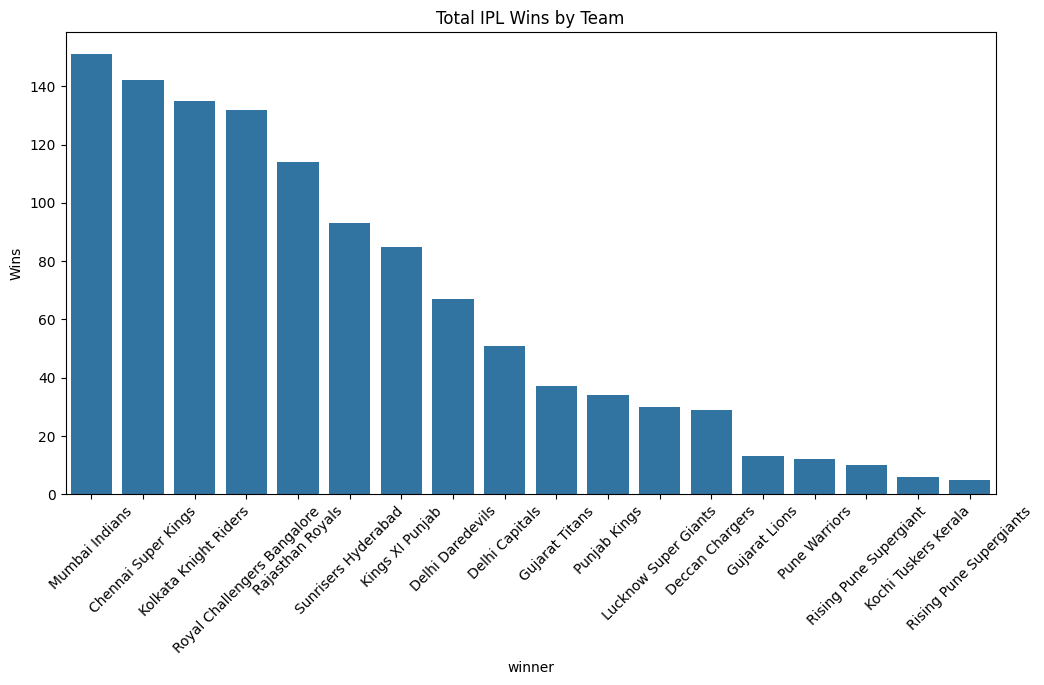

/tmp/ipython-input-2008533935.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
/tmp/ipython-input-2008533935.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
/tmp/ipython-input-2008533935.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid


Baseline Accuracy (Dummy): 0.508695652173913
Decision Tree Accuracy: 0.4782608695652174
Logistic Regression Accuracy: 0.5217391304347826
Random Forest Accuracy: 0.4782608695652174

🏆 BEST MODEL: Logistic Regression

Classification Report (Best Model):
              precision    recall  f1-score   support

  Team1 Wins       0.53      0.52      0.53       117
  Team2 Wins       0.51      0.52      0.52       113

    accuracy                           0.52       230
   macro avg       0.52      0.52      0.52       230
weighted avg       0.52      0.52      0.52       230



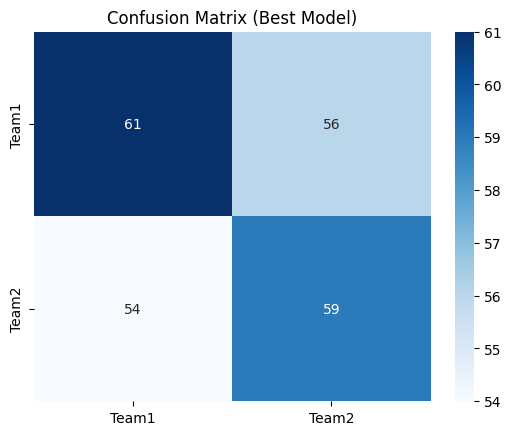

Cross-Validation Accuracy: 0.5113423201063224

🎯 ENTER MATCH DETAILS
Enter Team 1: Royal Challengers Bangalore
Enter Team 2: Chennai Super Kings
Enter Venue: M Chinnaswamy Stadium
Enter Toss Winner: Royal Challengers Bangalore
Enter Toss Decision (bat/field): field

🏏 MATCH DETAILS
Royal Challengers Bangalore vs Chennai Super Kings
Venue: M Chinnaswamy Stadium
Toss: Royal Challengers Bangalore (field)

📊 HEAD-TO-HEAD (DISPLAY ONLY)
Royal Challengers Bangalore Wins: 13
Chennai Super Kings Wins: 21

🏆 PREDICTED WINNER
Royal Challengers Bangalore

📈 WIN PROBABILITIES
Royal Challengers Bangalore: 52.50%
Chennai Super Kings: 47.50%

✅ Best model & encoders saved successfully


In [ ]:
# 1. IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import joblib

# 2. LOAD DATA
df = pd.read_csv("ipl_matches_cleaned.csv")

df.replace({'Royal Challengers Bengaluru': 'Royal Challengers Bangalore'}, inplace=True)

df = df[['team1', 'team2', 'venue', 'toss_winner', 'toss_decision', 'winner']]
df.dropna(subset=['winner'], inplace=True)

# 3. DISPLAY TOTAL WINS (DISPLAY ONLY)
total_wins = df['winner'].value_counts()
print("\n📊 TOTAL MATCH WINS (ALL TEAMS)")
print(total_wins)

plt.figure(figsize=(12,6))
sns.barplot(x=total_wins.index, y=total_wins.values)
plt.xticks(rotation=45)
plt.title("Total IPL Wins by Team")
plt.ylabel("Wins")
plt.show()

# 4. FEATURE ENGINEERING (MODEL ONLY)
df['home_team_advantage'] = (
    (df['team1'] == df['toss_winner']) |
    (df['team2'] == df['toss_winner'])
).astype(int)

df['winner_flag'] = np.where(df['winner'] == df['team1'], 0, 1)

# 5. FEATURES & TARGET
X = df[['team1', 'team2', 'venue', 'toss_winner',
        'toss_decision', 'home_team_advantage']]
y = df['winner_flag']

# 6. LABEL ENCODING
encoders = {}
for col in X.columns:
    if X[col].dtype == 'object':
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])
        encoders[col] = le

# 7. TRAIN–TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 8. BASELINE MODEL
dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(X_train, y_train)
dummy_acc = dummy.score(X_test, y_test)
print("\nBaseline Accuracy (Dummy):", dummy_acc)

# 9. DECISION TREE MODEL
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_acc = accuracy_score(y_test, dt_pred)
print("Decision Tree Accuracy:", dt_acc)

# 10. LOGISTIC REGRESSION MODEL
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_acc = accuracy_score(y_test, lr_pred)
print("Logistic Regression Accuracy:", lr_acc)

# 11. RANDOM FOREST + GRID SEARCH
param_grid = {'n_estimators': [100, 200], 'max_depth': [None, 10]}
grid = GridSearchCV(RandomForestClassifier(random_state=42),
                    param_grid, cv=3, scoring='accuracy')
grid.fit(X_train, y_train)

rf_model = grid.best_estimator_
rf_pred = rf_model.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)
print("Random Forest Accuracy:", rf_acc)

# 12. SELECT BEST MODEL
model_scores = {
    "Decision Tree": dt_acc,
    "Logistic Regression": lr_acc,
    "Random Forest": rf_acc
}

best_model_name = max(model_scores, key=model_scores.get)

if best_model_name == "Decision Tree":
    best_model = dt_model
elif best_model_name == "Logistic Regression":
    best_model = lr_model
else:
    best_model = rf_model

print("\n🏆 BEST MODEL:", best_model_name)

# 13. MODEL EVALUATION (BEST MODEL)
print("\nClassification Report (Best Model):")
print(classification_report(
    y_test,
    best_model.predict(X_test),
    target_names=["Team1 Wins", "Team2 Wins"]
))

cm = confusion_matrix(y_test, best_model.predict(X_test))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Team1", "Team2"],
            yticklabels=["Team1", "Team2"])
plt.title("Confusion Matrix (Best Model)")
plt.show()

print("Cross-Validation Accuracy:",
      cross_val_score(best_model, X, y, cv=5).mean())

# 14. HEAD-TO-HEAD FUNCTION (DISPLAY ONLY)
def head_to_head(team1, team2, data):
    matches = data[
        ((data.team1 == team1) & (data.team2 == team2)) |
        ((data.team1 == team2) & (data.team2 == team1))
    ]
    return ((matches.winner == team1).sum(),
            (matches.winner == team2).sum())

# ================= USER INPUT SECTION (ADDED) =================

print("\n🎯 ENTER MATCH DETAILS")

team1 = input("Enter Team 1: ")
team2 = input("Enter Team 2: ")
venue = input("Enter Venue: ")
toss_winner = input("Enter Toss Winner: ")
toss_decision = input("Enter Toss Decision (bat/field): ")

home_team_advantage = 1 if toss_winner in [team1, team2] else 0

# ===============================================================

h2h1, h2h2 = head_to_head(team1, team2, df)

custom_match = pd.DataFrame([{
    'team1': team1,
    'team2': team2,
    'venue': venue,
    'toss_winner': toss_winner,
    'toss_decision': toss_decision,
    'home_team_advantage': home_team_advantage
}])

for col in custom_match.columns:
    if col in encoders:
        custom_match[col] = encoders[col].transform(custom_match[col])

custom_match = custom_match[X.columns]

prediction = best_model.predict(custom_match)[0]
proba = best_model.predict_proba(custom_match)[0]

predicted_winner = team1 if prediction == 0 else team2

# 16. FINAL OUTPUT
print("\n🏏 MATCH DETAILS")
print(f"{team1} vs {team2}")
print(f"Venue: {venue}")
print(f"Toss: {toss_winner} ({toss_decision})")

print("\n📊 HEAD-TO-HEAD (DISPLAY ONLY)")
print(f"{team1} Wins: {h2h1}")
print(f"{team2} Wins: {h2h2}")

print("\n🏆 PREDICTED WINNER")
print(predicted_winner)

print("\n📈 WIN PROBABILITIES")
print(f"{team1}: {proba[0]*100:.2f}%")
print(f"{team2}: {proba[1]*100:.2f}%")

# 17. SAVE BEST MODEL
joblib.dump(best_model, "ipl_best_model.pkl")
joblib.dump(encoders, "ipl_label_encoders.pkl")

print("\n✅ Best model & encoders saved successfully")
